$f_i = a_ix_i^2 + b_ix + c_i - (d_1 - d_2N\sigma)x_i$

$\nabla_1 f = 2ax + b - d_1  + d_2N\sigma$

$\nabla_2 f = d_2Nx$

$\sigma = \frac{\sum \phi}{N}$, $\phi = x$

$(a_1, ..., a_5) = (1, 0.5, 0.8, 0.7, 1.1)$

$(b_1, ..., b_5) = (12, 10, 11, 11, 13)$

$(c_1, ..., c_5) = (5, 8, 6, 9, 7)$

$(\hat{d_1}, \hat{d_2}) = (200, 0.1)$

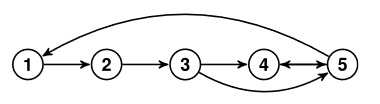

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 1000
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 0, 1/3],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 1/3],
    [0, 0, 1/3, 1/2, 1/3]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = x.copy()

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
aa = np.array([1.0, 0.5, 0.8, 0.7, 1.1])
bb = np.array([12.0, 10.0, 11.0, 11.0, 13.0])
cc = np.array([5.0, 8.0, 6.0, 9.0, 7.0])
dd = np.array([200.0, 0.1])
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (dd[1] * n * xx[i]) - (dd[1] * n * x[i])

def upd_x(i):
    xx[i] = x[i] - alpha * (2 * aa[i] * x[i] + bb[i] - dd[0] + dd[1] * n * z[i] + p[i])

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, aa, bb, cc, dd, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    x = np.random.randint(60, 100, n)
    x = np.float64(x)
    v = np.ones(n)
    s = x.copy()
    y = dd[1] * n * x
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(zz[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x = 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
    sum_x /= n
    for i in range(n):
        sum += aa[i] * ans_x[i][iter_num-1] ** 2 + bb[i] * ans_x[i][iter_num-1] + cc[i] - \
               (dd[0] - dd[1] * n * sum_x) * ans_x[i][iter_num-1]
    return sum

tmp = Iter_Num
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))
for i in range(n):
    print(ans_x[i][tmp-1])

经过1000轮迭代, 最终F(x)收敛到:  -35385.83719860849
56.494801693132516
114.98856126139555
71.24351623558977
81.42125011827316
50.90435445182422


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


x/y坐标的走势图


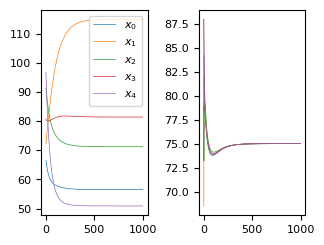

In [136]:
print('x/y坐标的走势图')
plt.subplot(121)
for i in range(n):
    plt.plot(range(1, Iter_Num+1), ans_x[i], linestyle='-', linewidth=0.5, label = '$x_'+(str)(i)+'$')
plt.legend(fontsize='small', prop={'size': 8}, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(122)
for i in range(n):
    plt.plot(range(1, Iter_Num+1), s_x[i], linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=8)
plt.rcParams['figure.figsize']=(8.58 / 2.54, 6.58 / 2.54)
plt.savefig('fig8.eps')